In [1]:
import os
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "./../data/raw/"

In [3]:
train_features= pd.read_csv(path+"train_features.csv")
train_targets_scored = pd.read_csv(path+"train_targets_scored.csv")
X = train_features
y = train_targets_scored

In [4]:
train_features.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [5]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 876 entries, sig_id to c-99
dtypes: float64(872), int64(1), object(3)
memory usage: 159.2+ MB


In [6]:
train_targets_scored.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X.shape

(23814, 876)

In [8]:
y.shape

(23814, 207)

In [11]:
samples = X.merge(y,on="sig_id",how="inner")
samples.shape

(23814, 1082)

# Important Computations:
1.n_samples, n_features, n_labels 
2.sparsity of labels
3.labels per sample distribution
4.top 20 most frequent MoA targets plot


In [12]:
features = X.iloc[:,1:]
targets= y.iloc[:,1:]
n_samples = len(samples)
n_features = len(features.columns)
n_labels = len(targets.columns)
n_samples,n_labels,n_features

(23814, 206, 875)

In [13]:
sparsity = targets.values.mean()
sparsity

np.float64(0.0034335680814337)

<Axes: >

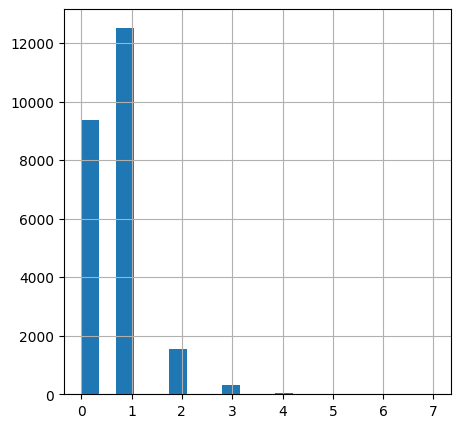

In [39]:
#labels per sample distribution 
labels_per_sample = targets.sum(axis=1)
labels_per_sample.hist(bins=20,figsize=(5,5))

<Axes: >

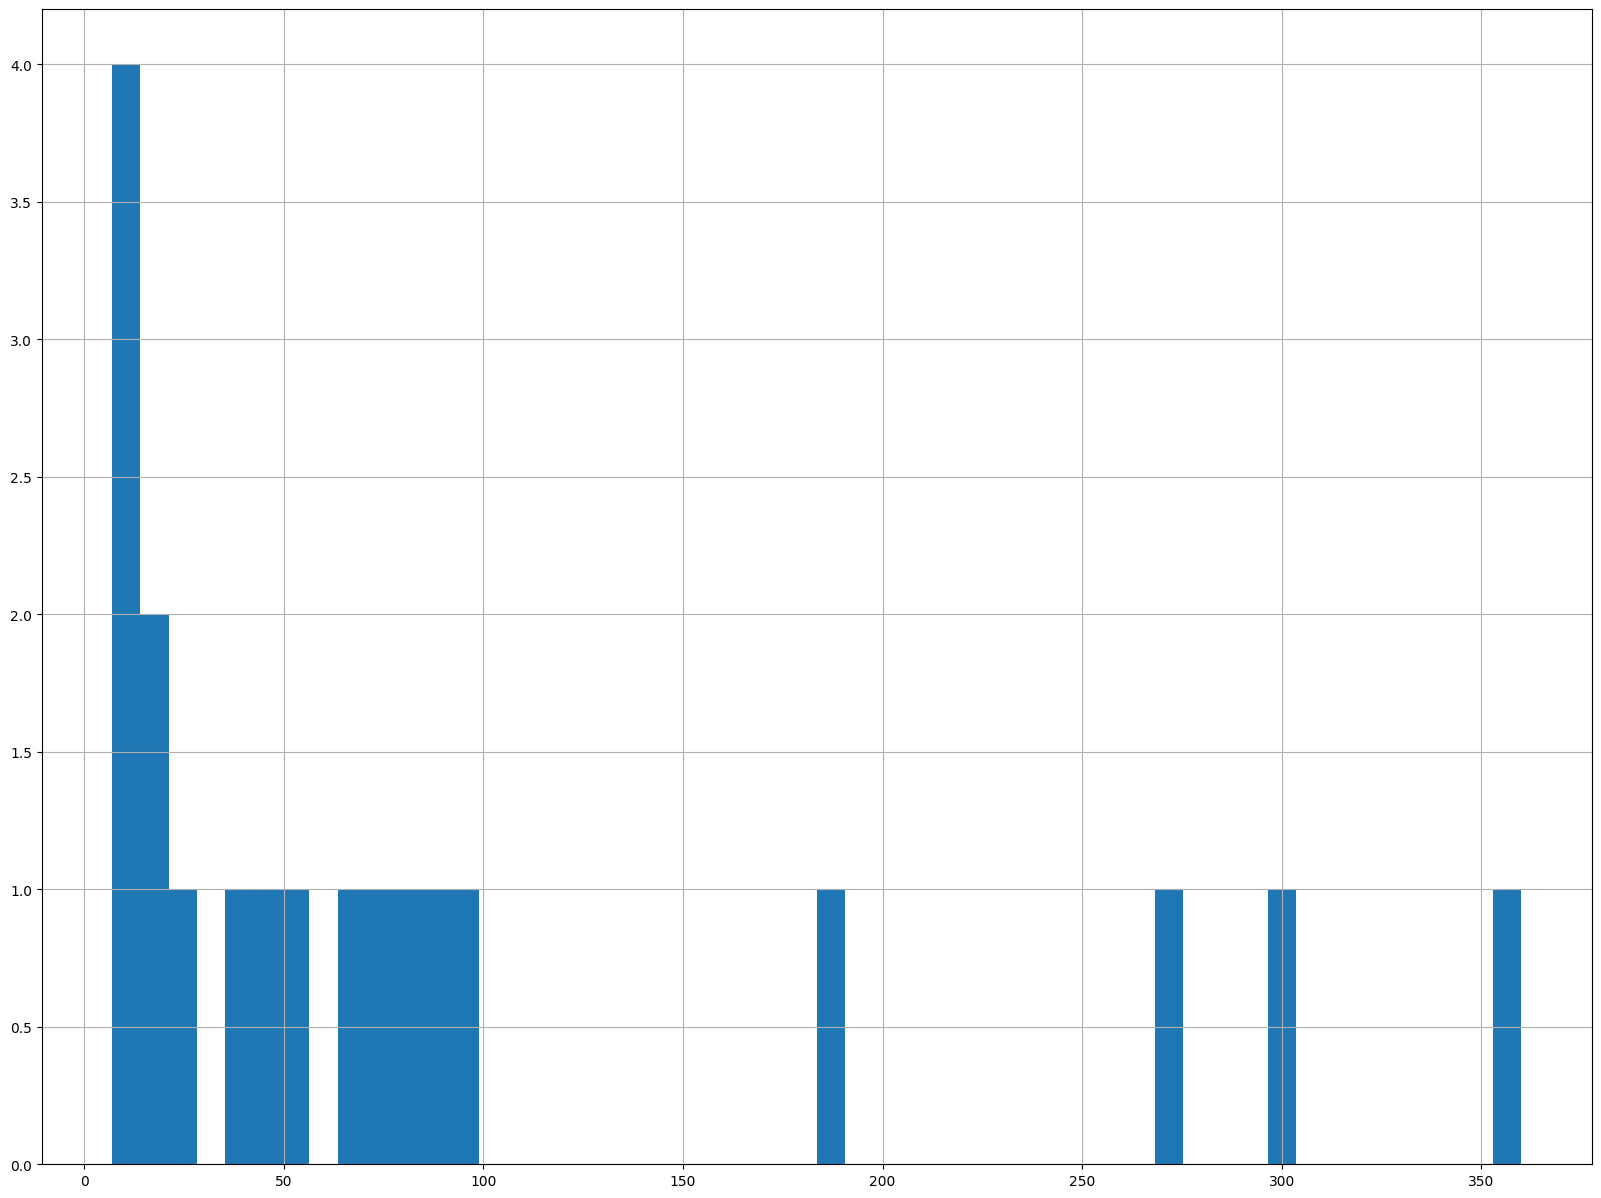

In [40]:
#top 20 most frequent MoA targets plot
frequency = targets.sum()
frequency.sort_values(ascending=False)
frequency[:19].hist(bins=50,figsize=(20,15))

# Train-Test Split

#### This splitting method would work as long as your dataset is not updated (thereby changing len(data) and the permutation)
Better to use hashing for a general case with dataset that can be updated. Fine for the scope of this project.

In [41]:
np.random.seed(42)

In [42]:
from sklearn.model_selection import GroupShuffleSplit
gss = GroupShuffleSplit(n_splits = 1,test_size=0.2,random_state=42)
train_indices,test_indices = next(gss.split(X,y,groups=X.iloc[:,0]))
train_indices

array([    0,     1,     2, ..., 23811, 23812, 23813], shape=(19051,))

In [43]:
X_train = X.iloc[train_indices]
y_train = y.iloc[train_indices]
X_test = X.iloc[test_indices]
y_test = y.iloc[test_indices]